In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        "A":[1,np.nan,3,4,5],
        "B":[6,7,8,np.nan,10],
        "C":[11,12,13,14,15]
    }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [2]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [3]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")

imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [4]:
df = pd.DataFrame(
    {
        "A":[1,2,3,4,5],
        "B":["a","b","a","b","c"]
    }
)
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df.loc[:,"B"])
le.transform(df.loc[:,"B"])

array([0, 1, 0, 1, 2])

In [6]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

df_ohe = df.copy()

le = LabelEncoder()

df_ohe.loc[:,"B"] = le.fit_transform(df_ohe.loc[:,"B"])

ohe = ColumnTransformer(
    [("OneHotEncoder",OneHotEncoder(),[1])],remainder="passthrough"
)

df_ohe = ohe.fit_transform(df_ohe)
df_ohe

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

In [1]:
import pandas as pd

df = pd.DataFrame(
    {
        "A":[1,2,3,4,5],
        "B":[100,200,300,400,500]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400
4,5,500


In [2]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [3]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X,y = iris.data,iris.target

print("X:")
print(X[:5,:])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [11]:
print(f"学習データセットの説明変数の形は{X_train.shape}です。")

学習データセットの説明変数の形は(105, 4)です。


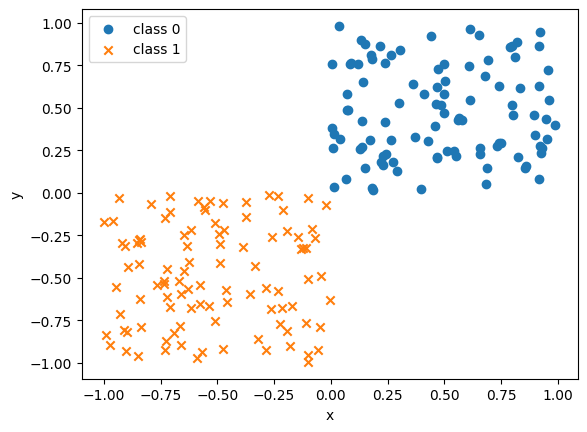

In [12]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)

X0 = rng.uniform(size=(100,2))
y0 = np.repeat(0,100)
X1 = rng.uniform(-1.0,0.0,size=(100,2))
y1 = np.repeat(1,100)

fig,ax = plt.subplots()
ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")
ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend()
plt.show()

In [26]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    svc = SVC(kernel=kernel,C=C)

    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))

    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")
    ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")

    xx,yy = np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
    xy = np.vstack([xx.ravel(),yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    ax.contour(xx,yy,p,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])

    ax.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=250,facecolors="none",edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

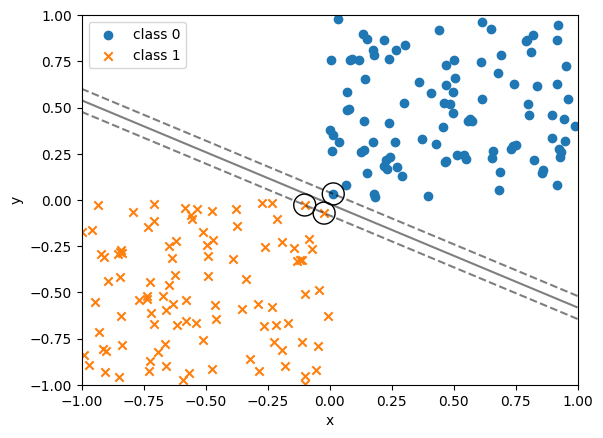

In [27]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel="linear",C=1e6)

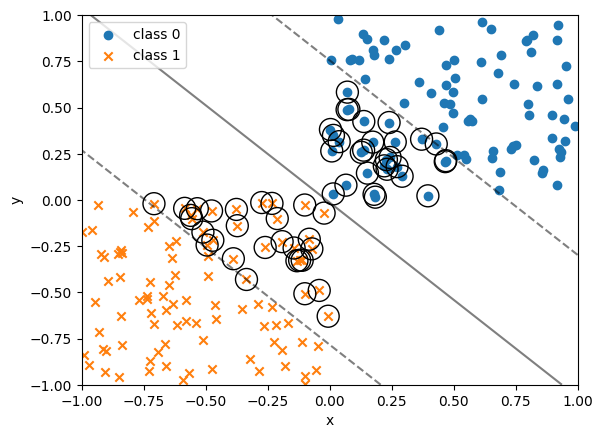

In [28]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel="linear",C=0.1)

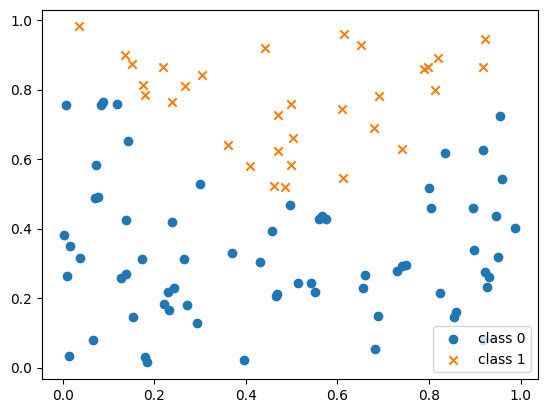

In [29]:
rng = np.random.default_rng(123)

X = rng.random(size=(100,2))
y = (X[:,1] > 2*(X[:,0]-0.5)**2 + 0.5).astype(int)

fig,ax = plt.subplots()
ax.scatter(X[y == 0,0],X[y == 0,1],marker="o",label="class 0")
ax.scatter(X[y == 1,0],X[y == 1,1],marker="x",label="class 1")

ax.legend(loc="best")
plt.show()

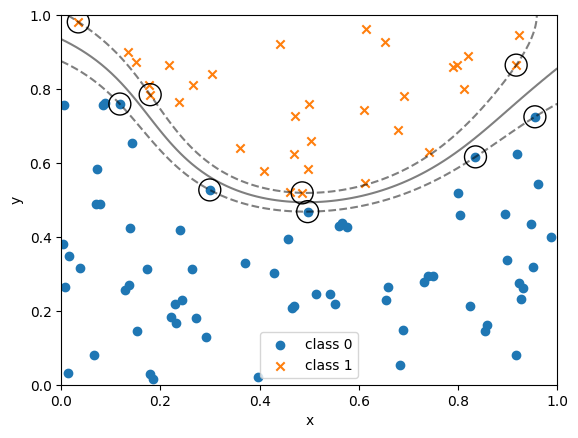

In [30]:
X0,X1 = X[y == 0,:],X[y == 1,:]
y0,y1 = y[y == 0],y[y == 1]
plot_boundary_margin_sv(X0,y0,X1,y1,kernel="rbf",C=1e3,xmin=0,ymin=0)

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X,y = iris.data,iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

tree = DecisionTreeClassifier(max_depth=3,random_state=123)

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [2]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree,filled=True,
    rounded=True,
    class_names=["Setosa","Vresicolor","Virginica"],
    feature_names=["Sepal Length","Sepal Width","Petal Length","Petal Width"],
    out_file=None
                          )

graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators=100,
    random_state=123
)

forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X,y = housing.data,housing.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)
y_pred

array([2.38551557, 1.43819761, 2.03910383, ..., 2.07597668, 2.58562082,
       2.429208  ], shape=(6192,))

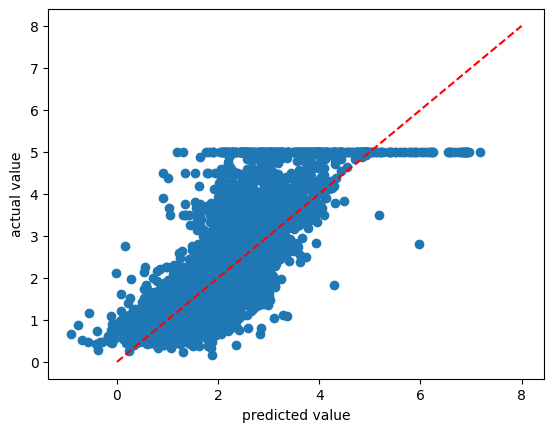

In [15]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(y_pred,y_test)
ax.plot((0,8),(0,8),linestyle="dashed",color="red")
ax.set_xlabel("predicted value")
ax.set_ylabel("actual value")

plt.show()

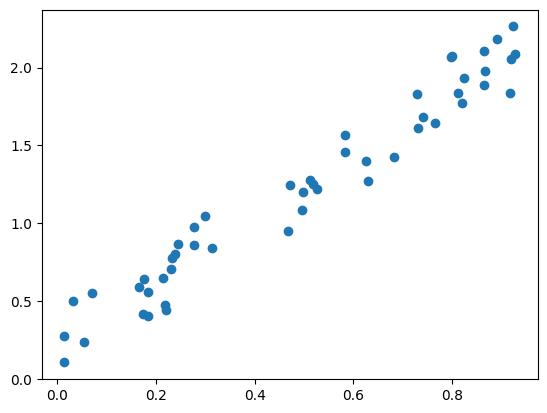

In [16]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)

X = rng.uniform(size=50)
Y = 2*X + 0.5*rng.uniform(size=50)

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(X,Y)

plt.show()


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(np.hstack((X.reshape(-1,1),Y.reshape(-1,1))))

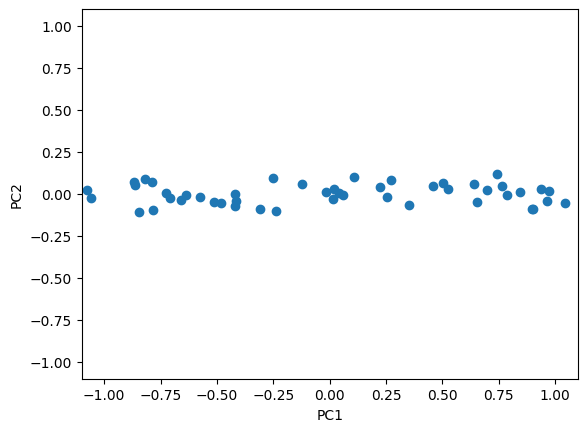

In [20]:
fig,ax = plt.subplots()
ax.scatter(X_pca[:,0],X_pca[:,1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
plt.show()

In [21]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X,y = iris.data[:100,:],iris.target[:100]

X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=123
)

svc = SVC()

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()

cross_val_score(svc,X,y,cv=10,scoring="precision")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

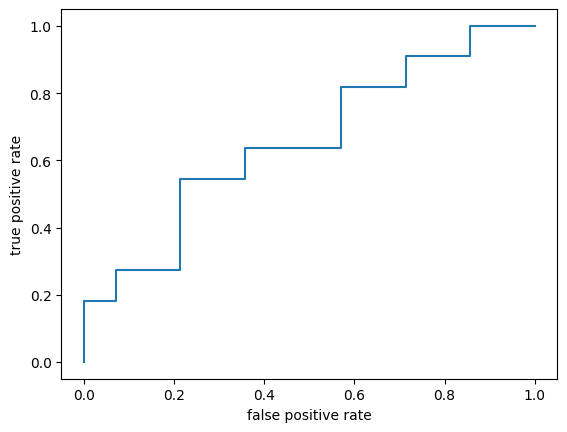

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fpr = np.array(
    [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6,7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14]
) / 14

tpr = np.array(
    [0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7,7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11]
) / 11

fig,ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

plt.show()

In [28]:
from sklearn.metrics import roc_curve

labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85,
                  0.8, 0.75, 0.71, 0.63, 0.55,
                  0.51, 0.47, 0.43, 0.38, 0.35,
                  0.31, 0.28, 0.24, 0.22, 0.19,
                  0.15, 0.12, 0.08, 0.04, 0.01])

fpr,tpr,threshold = roc_curve(labels,probs)
print("偽陽性率: ",fpr)
print("真陽性率: ",tpr)
# print(f"閾値: {threshold}")

偽陽性率:  [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率:  [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]
閾値: [ inf 0.98 0.95 0.9  0.87 0.8  0.63 0.51 0.47 0.35 0.28 0.22 0.19 0.12
 0.08 0.01]


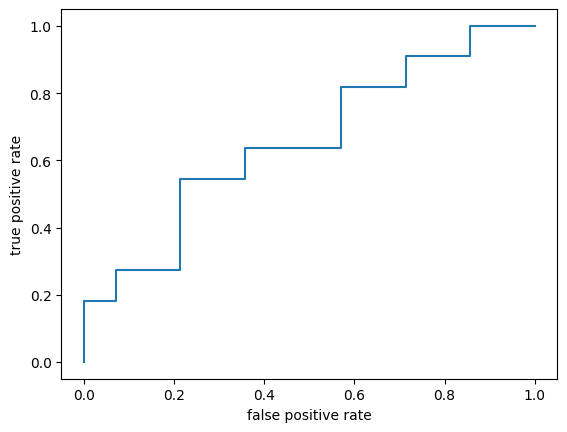

In [29]:
fig,ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(labels,probs)

np.float64(0.6558441558441558)

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

clf = DecisionTreeClassifier(random_state=123)
param_grid = {"max_depth":[3,4,5]}

cv = GridSearchCV(clf,param_grid=param_grid,cv=10)
cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 4, 5]})

In [38]:
cv.best_params_

{'max_depth': 3}

In [39]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=123)

In [41]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])